# Using a BERT model finetuned for financial headlines

In [1]:
# Imoprts
from newsplease import NewsPlease
import requests
from bs4 import BeautifulSoup
import unidecode
import json
import re
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Get news from Coinmarketcap
def get_news(num = 200):
    num_pages = num/200
    num_remaining = num
    news_data = []
    page = 1
    while num_remaining > 0:
        to_get = min(num_remaining, 200)
        url = f"https://api.coinmarketcap.com/content/v3/news?&page={page}&size={to_get}"
        res = requests.get(url)
        news_data += json.loads(res.text)['data']
        num_remaining -= to_get
        page += 1
    return news_data

In [15]:
# Get sentiment from BERT model
def prepare_text(text):
    return unidecode.unidecode(text.strip())

def get_sentiment(texts, url = 'http://127.0.0.1:8080/finbert'):
    js = { 'texts': texts }
    res = requests.post(url, json = js)
    return res.json()['ans']

def get_tweet_sentiment(tweet):
    sent = get_sentiment(tweet['text'])
    return sent

In [4]:
news = get_news(10)
print(len(news))

10


In [5]:
news

[{'slug': 'blockchain-com-closes-sponsorship-deal-with-dallas-cowboys',
  'assets': [{'name': 'Base Protocol', 'coinId': 7838, 'type': 'coin'},
   {'name': 'Ethereum Push Notification Service',
    'coinId': 9111,
    'type': 'coin'},
   {'name': 'RAMP', 'coinId': 7463, 'type': 'coin'},
   {'name': 'RED', 'coinId': 2771, 'type': 'coin'},
   {'name': 'iDealCash', 'coinId': 3439, 'type': 'coin'}],
  'createdAt': '2022-04-13T16:34:15.196Z',
  'meta': {'title': 'Blockchain.com closes sponsorship deal with Dallas Cowboys',
   'subtitle': '\n            Blockchain.com announced Wednesday the close of a sponsorship deal with the Dallas Cowboys as part of a broader marketing push to expand its retail user base in the US.\xa0\n                    ',
   'content': '<p>Blockchain.com announced Wednesday the close of a sponsorship deal with the Dallas Cowboys as part of a broader marketing push to expand its retail user base in the US.\xa0</p>\n<p>The deal comes as companies across the crypto indu

In [13]:
news_title_sub = [x['meta']['title'] + '. ' + x['meta']['subtitle'] for x in news]

In [17]:
sents = get_sentiment(news_title_sub[:50])
sents = np.array(sents)

In [18]:
sents

array([[0.54619062, 0.24516086, 0.20864849],
       [0.0560513 , 0.48141837, 0.46253031],
       [0.50636768, 0.04279299, 0.45083931],
       [0.02154092, 0.71510255, 0.26335651],
       [0.01899145, 0.67879933, 0.3022092 ],
       [0.50620818, 0.00948215, 0.48430964],
       [0.80133653, 0.1040437 , 0.09461977],
       [0.06027924, 0.76527202, 0.17444879],
       [0.94687861, 0.02966108, 0.0234603 ],
       [0.0325848 , 0.93383282, 0.03358241]])

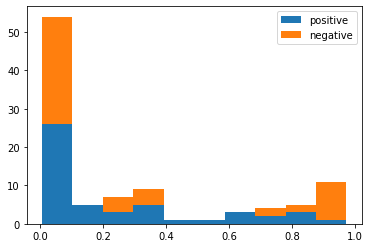

In [10]:
colors = ['positive', 'negative', 'neutral']
plt.hist(sents[:, [0, 1]], histtype = 'bar', stacked=True, label = colors)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


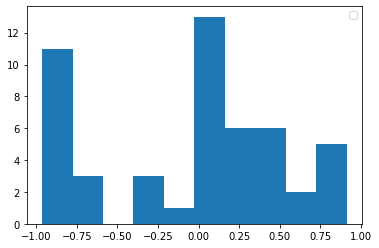

In [11]:
plt.hist(sents[:, 0] - sents[:, 1], histtype = 'bar')
plt.legend()

In [40]:
len(sents)

1000

In [42]:
counts = {i: news_title_sub.count(i) for i in news_title_sub}
{k: v for k, v in counts.items() if v > 1}

{}

In [ ]:
NewsPlease.